# a simple example of drawing data logs and application of unsupervised ML algorithms 


The data belongs to Eng ANDY and you can check the website from this link https://github.com/andymcdgeo/Andys_YouTube_Notebooks


firstly import the las file and then convert the data into data frame 




In [65]:
import lasio 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns


In [66]:
las_file = lasio.read("D:\python\geo by python\Andys_YouTube_Notebooks-main\Andys_YouTube_Notebooks-main\Data/15-9-19_SR_COMP.LAS")

to show some information of the las files and more datails about the wella and curves 


In [67]:
print( "the keys are  #### ",las_file.sections.keys(),"###")

the keys are  ####  dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other']) ###


In [68]:
print( "the curves  are  #### ", las_file.sections['Curves'] ,"###")
print("#"*35)

for item in las_file.sections['Well']:
    print(f"{item.descr}  ({item.mnemonic}): \t {item.value} \t\t {item.mnemonic}")
    

for item in las_file.sections['Curves']:
    print(f"{item.descr}\t {item.unit} \t {item.value} \t\t {item.mnemonic}")

the curves  are  ####  Mnemonic  Unit  Value         Description                       
--------  ----  -----         -----------                       
DEPT      M     00 001 00 00  1  DEPTH                          
AC        US/F                2  Sonic Transit Time (Slowness)  
CALI      IN                  3  Caliper                        
DEN       G/CC                4  Bulk Density                   
GR        GAPI                5  Gamma Ray                      
NEU       %                   6  Neutron Porosity               
RDEP      OHMM                7  Deep Resistivity               
RMED      OHMM                8  Medium Resistivity              ###
###################################
Top Depth  (STRT): 	 102.1568 		 STRT
Bottom Depth  (STOP): 	 4636.514 		 STOP
Depth Increment  (STEP): 	 0.1524 		 STEP
Null Value  (NULL): 	 -999.25 		 NULL
Field Name  (FLD): 	 Q15 		 FLD
NAME  (WELL): 	 15/9-19 		 WELL
WELLBORE  (WBN): 	 15/9-19 SR 		 WBN
COUNTRY  (NATI): 	 NOR 		 N

In [69]:
data_frame= las_file.df()
data_frame.head()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940


to make reindexing and change some of the names of logging curves 



In [70]:
data_frame.reset_index(inplace=True)
dict1={'DEPT':'DEPTH',"DEN":"DENSITY" ,"NEU":"NEUTRON","AC":"Sonic Transit Time "}
data_frame.rename(columns=dict1, inplace=True)
data_frame.tail(20)

,DEPTH,Sonic Transit Time,CALI,DENSITY,GR,NEUTRON,RDEP,RMED
6681,4633.6184,NaN,NaN,NaN,43.4302,NaN,0.8959,0.8544
6682,4633.7708,NaN,NaN,NaN,44.4231,NaN,0.8292,0.8776
6683,4633.9232,NaN,NaN,NaN,46.3090,NaN,0.7256,0.7962
6684,4634.0756,NaN,NaN,NaN,47.9344,NaN,0.6839,0.7266
6685,4634.2280,NaN,NaN,NaN,48.2071,NaN,0.6320,0.6023
6686,4634.3804,NaN,NaN,NaN,47.1122,NaN,0.5650,0.4680
6687,4634.5328,NaN,NaN,NaN,45.6109,NaN,0.5442,0.4383
6688,4634.6852,NaN,NaN,NaN,44.4111,NaN,0.6333,0.4856
6689,4634.8376,NaN,NaN,NaN,NaN,NaN,0.7113,0.6492
6690,4634.9900,NaN,NaN,NaN,NaN,NaN,0.7118,0.7457


to find the number of nulls and describre the data 

In [71]:
data_frame.info()
data_frame.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6701 entries, 0 to 6700
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DEPTH                6701 non-null   float64
 1   Sonic Transit Time   6579 non-null   float64
 2   CALI                 6579 non-null   float64
 3   DENSITY              6656 non-null   float64
 4   GR                   6689 non-null   float64
 5   NEUTRON              6668 non-null   float64
 6   RDEP                 6701 non-null   float64
 7   RMED                 6701 non-null   float64
dtypes: float64(8)
memory usage: 418.9 KB


,DEPTH,Sonic Transit Time,CALI,DENSITY,GR,NEUTRON,RDEP,RMED
count,6701.000000,6579.000000,6579.000000,6656.000000,6689.000000,6668.000000,6701.000000,6701.000000
mean,4125.974000,78.313607,9.550656,2.459291,36.048563,17.986061,3.221012,3.081261
std,294.826397,17.009535,0.906267,0.162682,26.705519,11.694084,8.860387,6.306741
min,3615.434000,1.025100,6.000000,2.037700,2.766100,2.178300,0.250300,0.294700
25%,3870.704000,66.169300,9.142900,2.341250,14.852300,10.244475,0.800600,0.844800
50%,4125.974000,74.145900,9.523800,2.514200,32.142600,15.245100,1.770000,1.801400
75%,4381.244000,89.024250,9.904800,2.589800,50.901700,22.952525,3.394000,3.537300
max,4636.514000,149.218700,20.285700,3.001300,304.333700,146.347400,198.537100,115.635000


to draw scatter plot between the density and neutron logs 

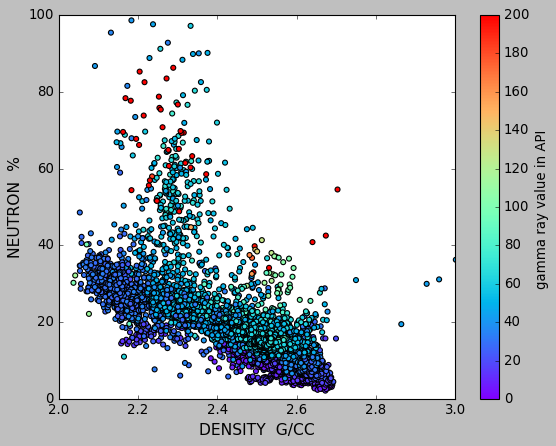

In [72]:
plt.style.use('classic')
X=data_frame["DENSITY"]
y=data_frame["NEUTRON"]
plt.scatter(X,y,c=data_frame["GR"],vmin=0, vmax=200, cmap='rainbow')
plt.xlabel('DENSITY  G/CC', fontsize=14)
plt.ylabel('NEUTRON  %', fontsize=14)
plt.xlim(2,3)
plt.ylim(0,100)
plt.colorbar(label="gamma ray value in API ")
plt.show()

to make unsupervised machine learning to classify the neutron density log into different regions 


In [73]:
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



firstly clean the nulls value 

In [74]:
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)
z= data_frame["Sonic Transit Time "] 
z = np.array(z).reshape(-1,1)
[X,y,z]





[array([[2.3429],
        [2.3528],
        [2.317 ],
        ...,
        [   nan],
        [   nan],
        [   nan]]),
 array([[44.5742],
        [62.1103],
        [71.9087],
        ...,
        [    nan],
        [    nan],
        [    nan]]),
 array([[ 95.7952],
        [ 94.2267],
        [101.3254],
        ...,
        [     nan],
        [     nan],
        [     nan]])]

In [75]:


ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='mean')
ImputedX = ImputedModule.fit(X)
X = ImputedX.transform(X)


#X Data
print('Density  Data is \n' , X[:10])

ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='mean')
Imputedy = ImputedModule.fit(y)
y = Imputedy.transform(y)
print('neutron Data is \n' , y[:10])


ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='mean')
Imputedy = ImputedModule.fit(z)
z= Imputedy.transform(z)
print("Sonic Transit Time  Data is \n" , z[:10])


Density  Data is 
 [[2.3429]
 [2.3528]
 [2.317 ]
 [2.2585]
 [2.2108]
 [2.2043]
 [2.2558]
 [2.3477]
 [2.4238]
 [2.4514]]
neutron Data is 
 [[44.5742]
 [62.1103]
 [71.9087]
 [44.8988]
 [49.5744]
 [33.7486]
 [25.1014]
 [15.9389]
 [14.3046]
 [12.7656]]
Sonic Transit Time  Data is 
 [[ 95.7952]
 [ 94.2267]
 [101.3254]
 [ 99.5672]
 [100.5965]
 [101.3599]
 [101.7746]
 [ 93.591 ]
 [ 86.7889]
 [113.5721]]


Normalize the data


In [76]:

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)
z = scaler.fit_transform(z)
[X,y,z]


[array([[-0.71792452],
        [-0.65685947],
        [-0.87768057],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]),
 array([[2.27943028],
        [3.78281936],
        [4.62284693],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]),
 array([[1.03731686e+00],
        [9.44245740e-01],
        [1.36546601e+00],
        ...,
        [8.43238912e-16],
        [8.43238912e-16],
        [8.43238912e-16]])]

to determine the best number of clusters 

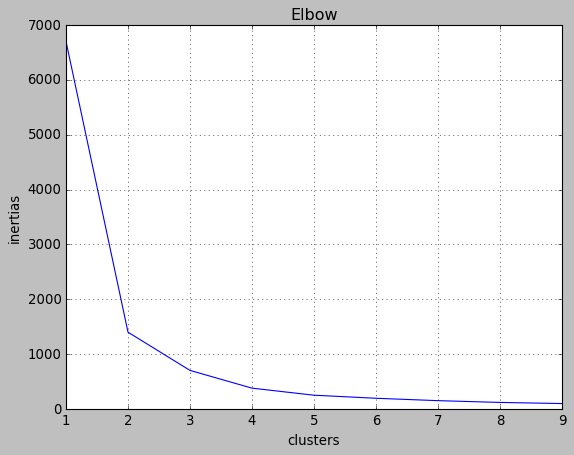

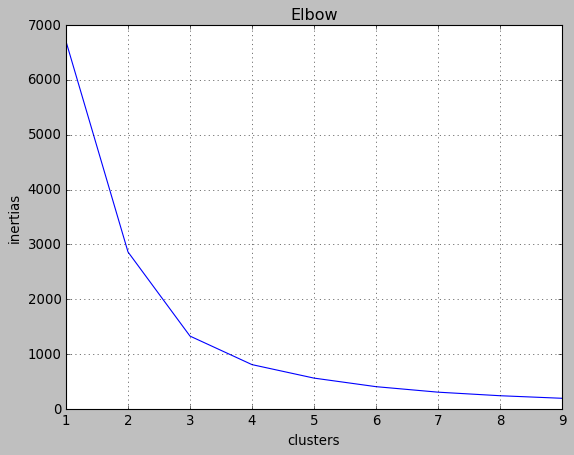

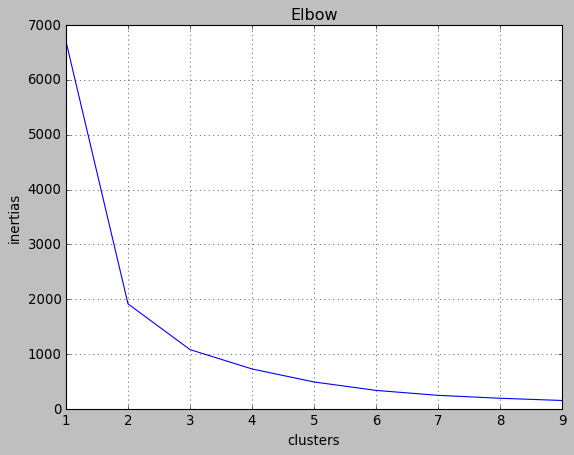

In [77]:
def best_model(data):
    inertia_list = []
    k = 10
    for i in range(1,k):
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(data)
        inertia_list.append(kmeans.inertia_)
    plt.plot(range(1,k),inertia_list)
    plt.title('Elbow')
    plt.xlabel('clusters')
    plt.ylabel('inertias')
    plt.grid(True)

    plt.show()

best_model(X)  ### using density data
best_model(y)   ### using Neutron data
best_model(z)    ### using Sonic log data

from the above plots, we can predict that the optimum number of clusters changes with changing the data 

In [78]:
# using density data 
KMeansModel1 = KMeans(n_clusters=3,init='k-means++', #also can be random
                     random_state=33,algorithm= 'auto',max_iter=300) # also can be full or elkan
KMeansModel1.fit(X)
KMeansModel1.labels_

data_frame["labels1 due to density"]=KMeansModel1.labels_

# using neutron data 
KMeansModel2= KMeans(n_clusters=3,init='k-means++', #also can be random
                     random_state=33,algorithm= 'auto',max_iter=300) # also can be full or elkan
KMeansModel2.fit(y)
KMeansModel2.labels_

data_frame["labels2 due to neutron"]=KMeansModel2.labels_

# using sonic data 

KMeansModel3= KMeans(n_clusters=3,init='k-means++', #also can be random
                     random_state=33,algorithm= 'auto',max_iter=300) # also can be full or elkan
KMeansModel3.fit(z)
KMeansModel3.labels_

data_frame["labels3 due to sonic data"]=KMeansModel3.labels_

#data_frame.dropna

data_frame



,DEPTH,Sonic Transit Time,CALI,DENSITY,GR,NEUTRON,RDEP,RMED,labels1 due to density,labels2 due to neutron,labels3 due to sonic data
0,3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359,2,2,0
1,3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028,2,2,0
2,3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958,1,2,0
3,3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929,1,2,0
4,3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
6696,4635.9044,NaN,NaN,NaN,NaN,NaN,0.7729,0.5978,2,0,2
6697,4636.0568,NaN,NaN,NaN,NaN,NaN,0.8369,0.6257,2,0,2
6698,4636.2092,NaN,NaN,NaN,NaN,NaN,0.8741,0.6888,2,0,2
6699,4636.3616,NaN,NaN,NaN,NaN,NaN,0.9002,0.8902,2,0,2


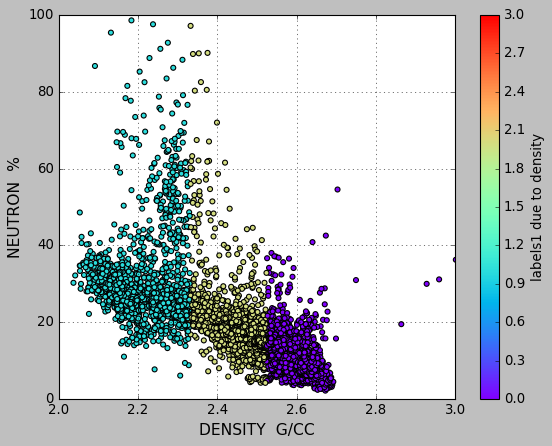

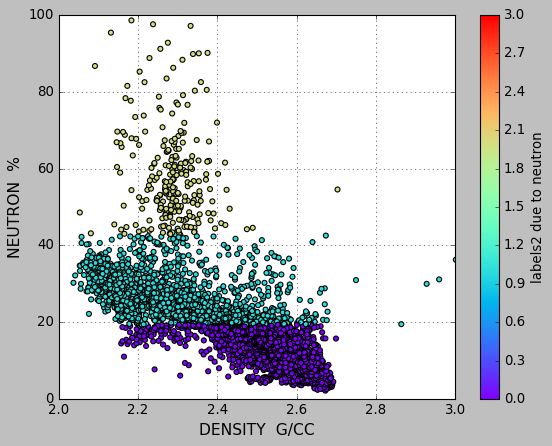

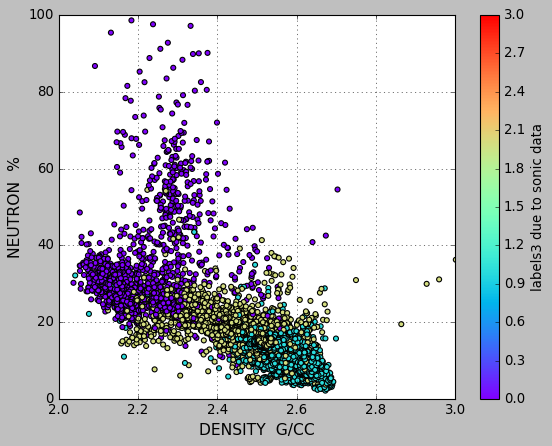

In [79]:
k=["labels1 due to density","labels2 due to neutron","labels3 due to sonic data"]

for i in k:
    x=data_frame["DENSITY"]
    y=data_frame["NEUTRON"]
    plt.scatter(x,y,c=data_frame[i],vmin=0, vmax=3, cmap='rainbow')
    plt.xlabel('DENSITY  G/CC', fontsize=14)
    plt.ylabel('NEUTRON  %', fontsize=14)
    plt.xlim(2,3)
    plt.ylim(0,100)
    plt.colorbar(label=i)
    plt.grid()
    plt.show()


#### from the above scatter plots, we can deduce that there is a difference between clusters depending on the data [neutron , density ,sonic log  ]used.

by making grouping by the labels we can determine the mean of each clusters.

In [80]:
data_frame[['DENSITY', 'labels1 due to density']].groupby(['labels1 due to density'], as_index=False).mean().sort_values(by='labels1 due to density', ascending=True)


,labels1 due to density,DENSITY
0,0,2.592712
1,1,2.206873
2,2,2.457225


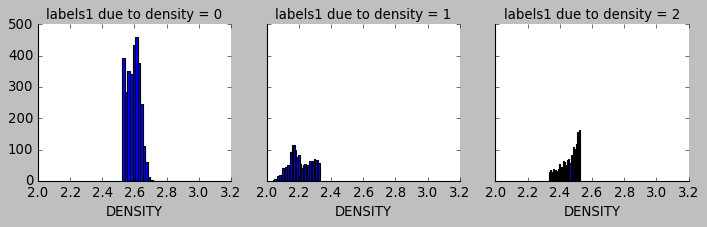

In [81]:
g = sns.FacetGrid(data_frame, col='labels1 due to density')
g.map(plt.hist,'DENSITY', bins=30)

### from the density data that exists at the previous table we can predict the major three main rock .the previous plot also  shows the distribution of the three clusters and this helps alot in predicting the rocks depending on the values.  for example we can predict that :
the first cluster is sand stone 
the second cluster is shale 
the third cluster is lime stone 
we can also aply the same idea to NEUTRON and SONIC logs 

In [82]:
data_frame[['NEUTRON', "labels2 due to neutron"]].groupby(["labels2 due to neutron"], as_index=False).mean().sort_values(by="labels2 due to neutron", ascending=True)


,labels2 due to neutron,NEUTRON
0,0,11.926569
1,1,26.732488
2,2,58.947524


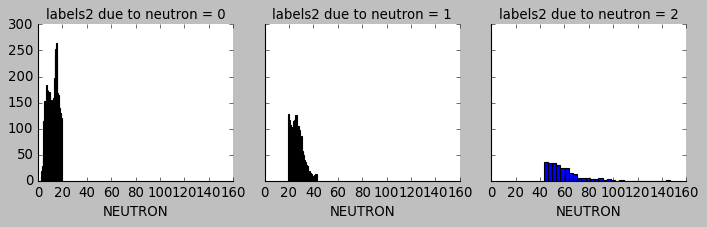

In [83]:
g = sns.FacetGrid(data_frame, col="labels2 due to neutron")
g.map(plt.hist,'NEUTRON', bins=30)

In [84]:
data_frame[["Sonic Transit Time ", 'labels3 due to sonic data']].groupby(['labels3 due to sonic data'], as_index=False).mean().sort_values(by="labels3 due to sonic data", ascending=True)

,labels3 due to sonic data,Sonic Transit Time
0,0,103.989155
1,1,63.589495
2,2,78.320308


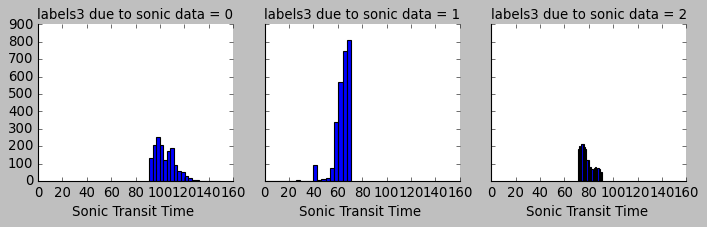

In [85]:

g = sns.FacetGrid(data_frame, col='labels3 due to sonic data')
g.map(plt.hist, "Sonic Transit Time ", bins=20) 

### By merging the density and neutron in one plot for more precise interpretation 


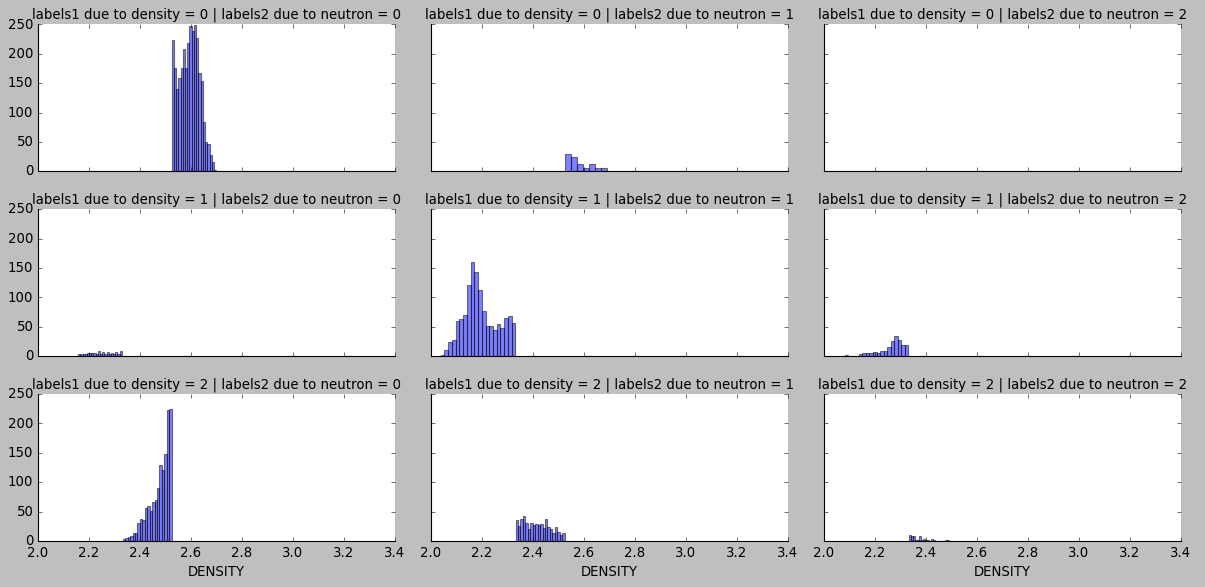

In [86]:
grid = sns.FacetGrid(data_frame, col="labels2 due to neutron", row='labels1 due to density', height=2.5, aspect=2)
grid.map(plt.hist,"DENSITY", alpha=.5, bins=20)
grid.add_legend()

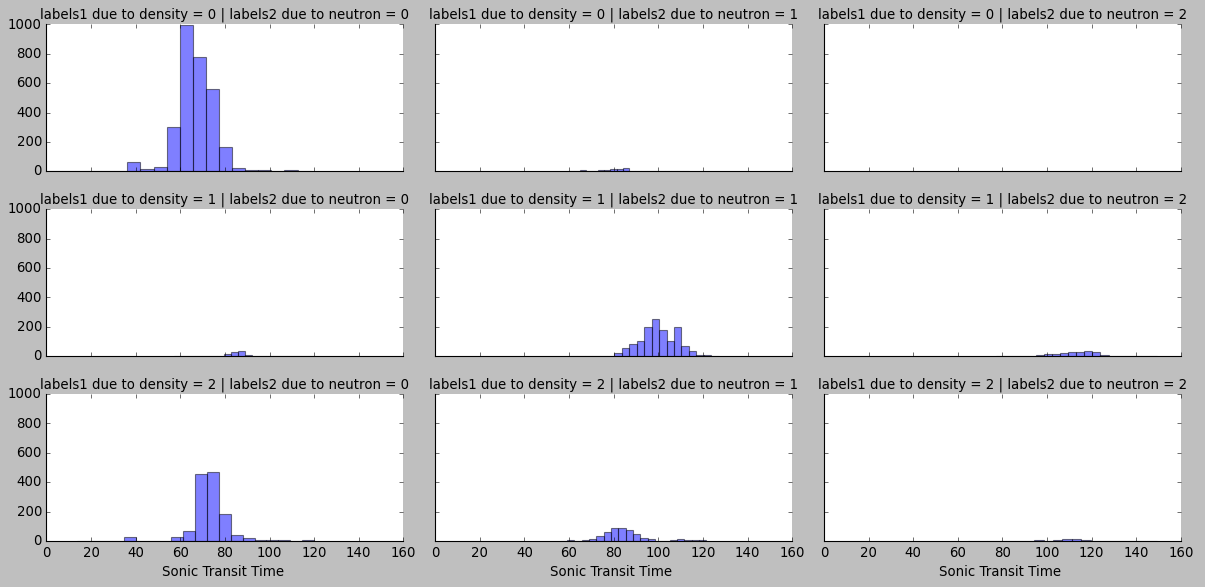

In [87]:
grid = sns.FacetGrid(data_frame, col="labels2 due to neutron", row='labels1 due to density', height=2.5, aspect=2)
grid.map(plt.hist,"Sonic Transit Time ", alpha=.5, bins=20)
grid.add_legend()

the above plot shows that there is a large homegenity between clusters (the clusters distribution is homogeneous in large scale ) that produced by neutron and density data logs 

In [88]:
k = range(1,6)
for i in k:
    KMeansModel= KMeans(n_clusters=i,init='k-means++', #also can be random
                         random_state=33,algorithm= 'auto',max_iter=300) # also can be full or elkan
    KMeansModel.fit(X)
    KMeansModel.labels_

    data_frame[f"clusters{i}"]= KMeansModel.labels_
data_frame


,DEPTH,Sonic Transit Time,CALI,DENSITY,GR,NEUTRON,RDEP,RMED,labels1 due to density,labels2 due to neutron,labels3 due to sonic data,clusters1,clusters2,clusters3,clusters4,clusters5
0,3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359,2,2,0,0,1,2,2,1
1,3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028,2,2,0,0,1,2,2,1
2,3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958,1,2,0,0,1,1,2,1
3,3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929,1,2,0,0,1,1,2,1
4,3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940,1,2,0,0,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6696,4635.9044,NaN,NaN,NaN,NaN,NaN,0.7729,0.5978,2,0,2,0,0,2,3,2
6697,4636.0568,NaN,NaN,NaN,NaN,NaN,0.8369,0.6257,2,0,2,0,0,2,3,2
6698,4636.2092,NaN,NaN,NaN,NaN,NaN,0.8741,0.6888,2,0,2,0,0,2,3,2
6699,4636.3616,NaN,NaN,NaN,NaN,NaN,0.9002,0.8902,2,0,2,0,0,2,3,2


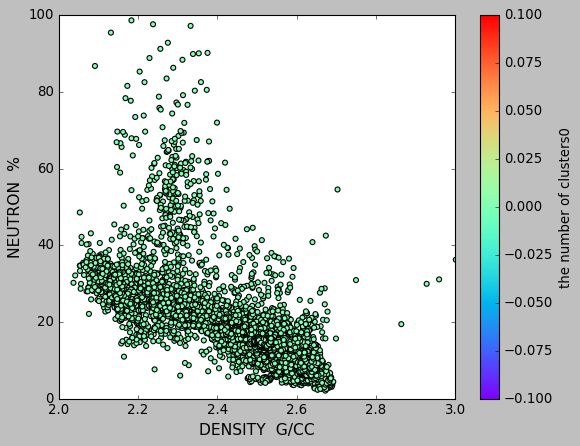

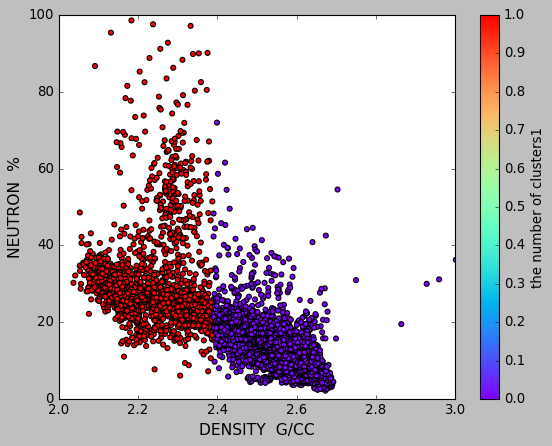

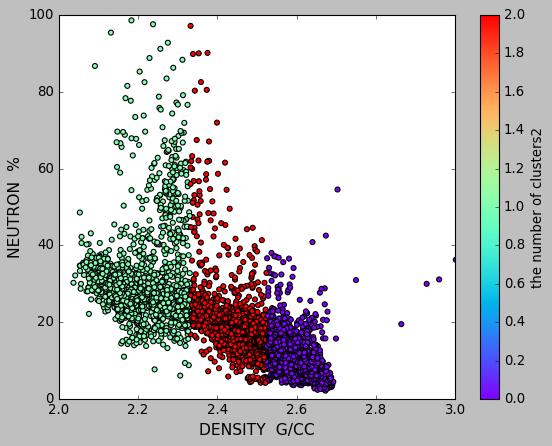

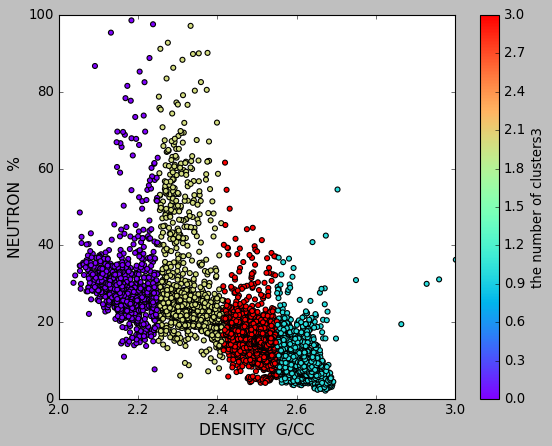

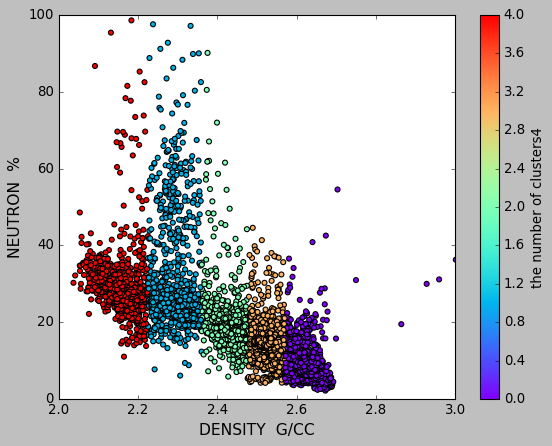

In [89]:


m=["clusters1","clusters2","clusters3","clusters4","clusters5"]
for n,i in enumerate (m):
    X=data_frame["DENSITY"]
    y=data_frame["NEUTRON"]
    plt.scatter(X,y,c = data_frame[i],vmin=0, vmax=n ,cmap='rainbow')
    plt.xlabel('DENSITY  G/CC', fontsize=14)
    plt.ylabel('NEUTRON  %', fontsize=14)
    plt.xlim(2,3)
    plt.ylim(0,100)
    plt.colorbar(label=f"the number of clusters{n}")
    plt.show()
